In [4]:
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk

nltk.download('punkt')

string = "The science of today is the technology of tomorrow. \
    Tomorrow is today."

# tokenize sentences
tokenized_sentences = sent_tokenize(string)
print(tokenized_sentences)

# tokenize words
tokenized_words = word_tokenize(string)
print(tokenized_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
['The science of today is the technology of tomorrow.', 'Tomorrow is today.']
['The', 'science', 'of', 'today', 'is', 'the', 'technology', 'of', 'tomorrow', '.', 'Tomorrow', 'is', 'today', '.']


In [7]:
from nltk.corpus import stopwords

nltk.download('stopwords')

# load stop words
stop_words = stopwords.words('english')

# show stop words
stop_words[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
# Remove stop words
nonstop_words = []
for word in tokenized_words:
    if word not in stop_words:
        nonstop_words.append(word)
print(nonstop_words)       

['The', 'science', 'today', 'technology', 'tomorrow', '.', 'Tomorrow', 'today', '.']


In [9]:
# Stemming
from nltk.stem.porter import PorterStemmer

# Create stemmer
porter = PorterStemmer()

# Apply stemmer
for word in tokenized_words:
    print(porter.stem(word))
    

the
scienc
of
today
is
the
technolog
of
tomorrow
.
tomorrow
is
today
.


In [10]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Create lemmatizer object 
lemmatizer = WordNetLemmatizer()

# Lemmatize each word and display the output
for word in tokenized_words:
    #output = lemmatizer.lemmatize(word, pos='n')
    print(lemmatizer.lemmatize(word, pos='n'))

The
science
of
today
is
the
technology
of
tomorrow
.
Tomorrow
is
today
.


In [11]:
# Tag Parts Of Speech
from nltk import pos_tag
from nltk import word_tokenize

nltk.download('averaged_perceptron_tagger')

# Use pre-trained part of speech tagger
tokenized_words = word_tokenize(string)
text_tagged = pos_tag(tokenized_words)
print(text_tagged)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nik\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[('The', 'DT'), ('science', 'NN'), ('of', 'IN'), ('today', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('technology', 'NN'), ('of', 'IN'), ('tomorrow', 'NN'), ('.', '.'), ('Tomorrow', 'NN'), ('is', 'VBZ'), ('today', 'NN'), ('.', '.')]


In [1]:
# Bag of Words model
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create text
text_data = np.array(['I love San Francisco!',
                      'New York is best',
                      'LA beats both'])

In [2]:
# Create the bag of words feature matrix
count = CountVectorizer() 
bag_of_words = count.fit_transform(text_data)

# Show feature matrix
bag_of_words.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [3]:
# Get feature names
feature_names = count.get_feature_names()
print(feature_names)

['beats', 'best', 'both', 'francisco', 'is', 'la', 'love', 'new', 'san', 'york']


In [4]:
# Create data frame
df = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)
print(df)

   beats  best  both  francisco  is  la  love  new  san  york
0      0     0     0          1   0   0     1    0    1     0
1      0     1     0          0   1   0     0    1    0     1
2      1     0     1          0   0   1     0    0    0     0


In [5]:
# Term Frequency – Inverse Document Frequency (TF – IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

obj = TfidfVectorizer()
corpus = text_data
#['This is sample document.', 'another random document.', 'third sample document text']

X = obj.fit_transform(corpus)
print(X)

  (0, 3)	0.5773502691896257
  (0, 8)	0.5773502691896257
  (0, 6)	0.5773502691896257
  (1, 1)	0.5
  (1, 4)	0.5
  (1, 9)	0.5
  (1, 7)	0.5
  (2, 2)	0.5773502691896257
  (2, 0)	0.5773502691896257
  (2, 5)	0.5773502691896257


In [8]:
from gensim.models import Word2Vec

sentences = [['data', 'science'], 
             ['science', 'data', 'analytics'], 
             ['machine', 'learning'], 
             ['Woodbury', 'computer', 'science'],
             ['deep', 'learning']]

# train the model on your corpus  
model = Word2Vec(sentences, min_count = 1)

#print(model.wv.similarity('data', 'science'))
#print(model.wv.similarity('data', 'deep'))
print(model.wv.similarity('Woodbury', 'science'))

0.026215607


In [9]:
print(model['Woodbury'])

[ 1.6771069e-03 -2.4801379e-03  2.7102870e-03  2.9420862e-03
 -4.0437342e-03  4.8680091e-03 -3.5027429e-03  4.1962676e-03
  2.2722638e-04 -2.1593650e-03  2.1477023e-03  2.0658369e-03
  2.2331949e-03 -8.2140783e-04 -7.9386111e-04 -4.4558616e-04
  9.6034631e-04  8.7889750e-04 -4.6757460e-03 -1.3402711e-03
  3.4846787e-03  2.6265646e-03 -4.4090003e-03  3.4084644e-03
  1.8262457e-03  4.1863187e-03 -3.9402382e-03  2.0958225e-03
  1.8189522e-03  2.9207328e-03  4.9465327e-03  1.1930724e-03
  3.3976161e-03 -3.4802666e-04  3.5873966e-03  4.1323667e-03
  2.1031438e-03 -3.8345214e-03 -1.8629974e-03 -9.4774507e-05
 -4.7902432e-03 -2.1491435e-03  2.0629163e-03  2.9783169e-04
  4.3090829e-03  3.1589152e-04 -5.4647721e-04 -1.4366169e-03
  1.3678562e-03  8.4287859e-04 -9.3873247e-04  3.1379154e-03
  2.2770367e-03 -4.8702275e-03  4.8477161e-03 -8.4797438e-04
 -4.3108086e-03 -9.6774212e-04 -3.6457812e-03  2.9949897e-03
  2.3395463e-03 -3.1171399e-03 -9.2078961e-04 -1.3233407e-03
 -5.6163414e-04 -2.21823

In [ ]:
# download a bunch of texts
import nltk
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')


In [10]:
import nltk
from nltk.book import *
texts()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [11]:
print(text6)

<Text: Monty Python and the Holy Grail>


In [12]:
print(text6.concordance("knight"))


Displaying 25 of 84 matches:
: Man ! ARTHUR : Man . Sorry . What knight live in that castle over there ? DE
rthur music ] [ music stops ] BLACK KNIGHT : Aaagh ! [ King Arthur music ] [ m
rthur music ] [ music stops ] BLACK KNIGHT : Aaagh ! GREEN KNIGHT : Ooh ! [ Ki
tops ] BLACK KNIGHT : Aaagh ! GREEN KNIGHT : Ooh ! [ King Arthur music ] [ mus
ic ] [ music stops ] [ stab ] BLACK KNIGHT : Aagh ! GREEN KNIGHT : Oh ! [ King
 stab ] BLACK KNIGHT : Aagh ! GREEN KNIGHT : Oh ! [ King Arthur music ] Ooh ! 
music ] Ooh ! [ music stops ] BLACK KNIGHT : Aaagh ! [ clang ] BLACK KNIGHT an
CK KNIGHT : Aaagh ! [ clang ] BLACK KNIGHT and GREEN KNIGHT : Agh !, oh !, etc
 ! [ clang ] BLACK KNIGHT and GREEN KNIGHT : Agh !, oh !, etc . GREEN KNIGHT :
N KNIGHT : Agh !, oh !, etc . GREEN KNIGHT : Aaaaaah ! Aaaaaaaaah ! [ woosh ] 
ah ! Aaaaaaaaah ! [ woosh ] [ BLACK KNIGHT kills GREEN KNIGHT ] [ thud ] [ scr
 woosh ] [ BLACK KNIGHT kills GREEN KNIGHT ] [ thud ] [ scrape ] BLACK KNIGHT 
 KNIGHT ] [ thud ] [ sc

In [13]:
print(text6.similar("knight"))

and so well question oh strand couple sort system shall launcelot task
way string glass cry feint
None


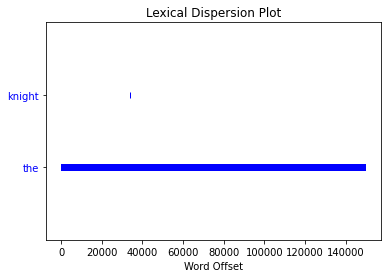

In [14]:
text4.dispersion_plot(["knight", "the"])

In [15]:
len(text6)

16967

In [16]:
sorted(set(text6))

['!',
 '!)',
 '!,',
 '!]',
 '#',
 "'",
 "'!",
 "',",
 "'.",
 "'...",
 "'?",
 '(',
 ',',
 ",'",
 ',--',
 '-',
 '--',
 '--...',
 '.',
 ".'",
 '.)',
 '..',
 '...',
 '...?',
 '...]',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '?!',
 'A',
 'ALL',
 'AMAZING',
 'ANIMATOR',
 'ARMY',
 'ARTHUR',
 'Aaaaaaaaah',
 'Aaaaaaaah',
 'Aaaaaah',
 'Aaaah',
 'Aaaaugh',
 'Aaagh',
 'Aaah',
 'Aaauggh',
 'Aaaugh',
 'Aaauugh',
 'Aagh',
 'Aah',
 'Aauuggghhh',
 'Aauuugh',
 'Aauuuuugh',
 'Aauuuves',
 'Action',
 'Actually',
 'African',
 'Ages',
 'Aggh',
 'Agh',
 'Ah',
 'Ahh',
 'Alice',
 'All',
 'Allo',
 'Almighty',
 'Alright',
 'Am',
 'Amen',
 'An',
 'Anarcho',
 'And',
 'Angnor',
 'Anthrax',
 'Antioch',
 'Anybody',
 'Anyway',
 'Apples',
 'Aramaic',
 'Are',
 'Arimathea',
 'Armaments',
 'Arthur',
 'As',
 'Ask',
 'Assyria',
 'At',
 'Attila',
 'Augh',
 'Autumn',
 'Auuuuuuuugh',
 'Away',


In [17]:
text6.count("knight")

5